<a href="https://colab.research.google.com/github/Chhavi-Trivedi/Keras/blob/main/dogsVsCatsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional neural network**
This is a seqential CNN model for Dogs vs Cats image classification.The Data set has been taken from Kaggle Dogs-vs-cats compitition.
Here, firstly a CNN model is made from scratch, then it is fine-tuned with VGG16 model to increase accuracy. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Libraries**

In [3]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import random
import glob
import shutil
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

### **Set Path**

In [4]:
train_path = '/content/drive/MyDrive/train'
valid_path = '/content/drive/MyDrive/valid'
test_path = '/content/drive/MyDrive/test'

### **Fit the data as per the model's requirement**

In [5]:
train_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input) \
	.flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input) \
	.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input) \
	.flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat','dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
assert train_batches.n == 1000
assert valid_batches.n ==200
assert test_batches.n ==100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes ==2


In [7]:
imgs, labels = next(train_batches)

In [8]:
def plotImages(imgs):
	fig, axes = plt.subplots(1, 10, figsize=(20,20))
	axes = axes.flatten()
	for img, ax in zip(imgs, axes):
		ax.imshow(img)
		ax.axis('off')
	plt.tight_layout()
	plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

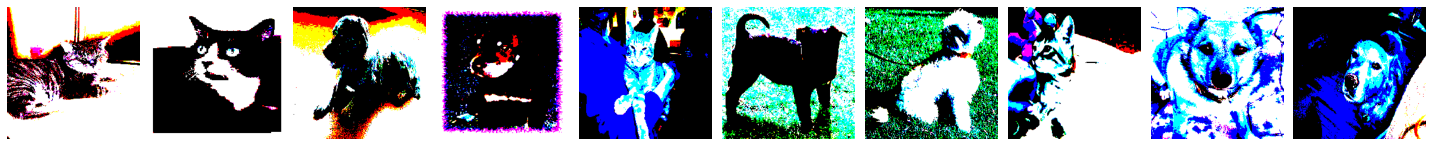

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [9]:
plotImages(imgs)
print(labels)

## **Build and train a CNN**

In [14]:
model=Sequential([
             Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'same', input_shape=(224,224,3)),
             MaxPool2D(pool_size=(2,2), strides=2),
             Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
             MaxPool2D(pool_size=(2,2), strides=2),
             Flatten(),
             Dense(units=2, activation='softmax'),

])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 25s - loss: 20.0466 - accuracy: 0.6050 - val_loss: 4.6927 - val_accuracy: 0.6200
Epoch 2/10
100/100 - 5s - loss: 2.8915 - accuracy: 0.7420 - val_loss: 2.9883 - val_accuracy: 0.6350
Epoch 3/10
100/100 - 5s - loss: 0.6136 - accuracy: 0.8880 - val_loss: 2.0935 - val_accuracy: 0.7250
Epoch 4/10
100/100 - 5s - loss: 0.2382 - accuracy: 0.9410 - val_loss: 2.1592 - val_accuracy: 0.7000
Epoch 5/10
100/100 - 5s - loss: 0.0714 - accuracy: 0.9840 - val_loss: 3.1280 - val_accuracy: 0.6700
Epoch 6/10
100/100 - 5s - loss: 0.0338 - accuracy: 0.9880 - val_loss: 2.2627 - val_accuracy: 0.7050
Epoch 7/10
100/100 - 5s - loss: 0.1239 - accuracy: 0.9630 - val_loss: 3.3120 - val_accuracy: 0.6700
Epoch 8/10
100/100 - 5s - loss: 0.0188 - accuracy: 0.9930 - val_loss: 2.5955 - val_accuracy: 0.6750
Epoch 9/10
100/100 - 5s - loss: 0.0018 - accuracy: 0.9990 - val_loss: 2.3376 - val_accuracy: 0.6800
Epoch 10/10
100/100 - 5s - loss: 4.3096e-04 - accuracy: 1.0000 - val_loss: 2.2268 - val_accuracy: 

## **Predict**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

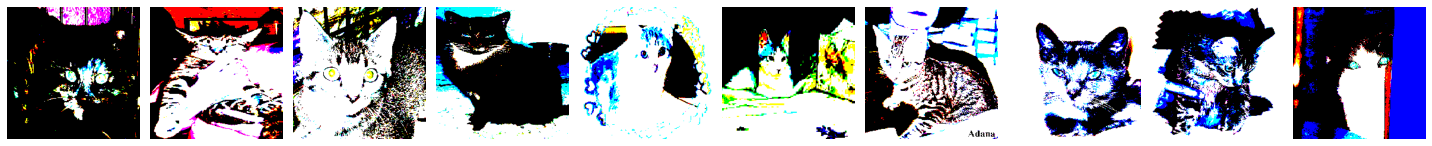

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [17]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [18]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [19]:
prediction = model.predict(x= test_batches, verbose=0)

In [20]:
np.round(prediction)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [21]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred=np.argmax(prediction, axis=-1))

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
      cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')
    print(cm)

    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i,j],
               horizontalalignment="center",
               color="white" if cm[i, j]> thresh else "black")
      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label')

In [23]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[30 20]
 [16 34]]


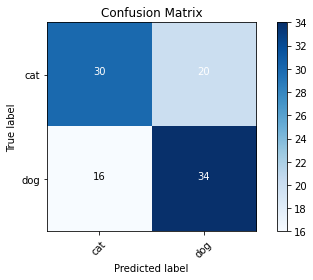

In [24]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## **Fine Tuning : VGG16 model**
As the model was showing overfitting we would use fine tunning to increase the accuracy of the model.

In [25]:
#downloading a model 
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 3s 0us/step


In [26]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [27]:
type(vgg16_model) #model type is functional type thus we need to convert it into sequential model
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

### **Making the layers non-trainable**
The VGG16 model is already trained to the cat and dog categories so, do not need to train it again.Thus we freeze the weights and baises of the model so that they do not get retrained.


In [29]:
for layer in model.layers:
  layer.trainable=False

In [30]:
#adding our own output layer for cats and dogs
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.summary()

## **Train the fine-tuned VGG16 model**

In [32]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2 )

Epoch 1/5
100/100 - 9s - loss: 0.4166 - accuracy: 0.8290 - val_loss: 0.0910 - val_accuracy: 0.9650
Epoch 2/5
100/100 - 7s - loss: 0.1109 - accuracy: 0.9610 - val_loss: 0.0520 - val_accuracy: 0.9800
Epoch 3/5
100/100 - 8s - loss: 0.0705 - accuracy: 0.9760 - val_loss: 0.0402 - val_accuracy: 0.9850
Epoch 4/5
100/100 - 8s - loss: 0.0512 - accuracy: 0.9850 - val_loss: 0.0329 - val_accuracy: 0.9850
Epoch 5/5
100/100 - 7s - loss: 0.0392 - accuracy: 0.9920 - val_loss: 0.0293 - val_accuracy: 0.9950


In [34]:
assert model.history.history.get('accuracy')[-1]>0.95

## **Predict using fine-tuned VGG16 model**

In [35]:
predictions = model.predict(x=test_batches, verbose=0)

In [36]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [37]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [38]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[49  1]
 [ 1 49]]


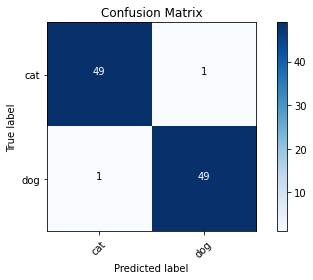

In [39]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

###**Conclusion** - Our model just predicted 49/50 images to be dogs which were actually dogs and also it only misclassified one image as a dog when it actually was a cat.  